In [91]:
%load_ext autoreload
%autoreload 2
%aimport
%matplotlib inline 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Modules to reload:
all-except-skipped

Modules to skip:



In [92]:
# organizing output
import torch
from case_studies.coadds.get_results import _stack_data, _preprocess_data

In [93]:
d = torch.load("../output/cache/42/metrics_mags.pt")

In [94]:
for k, v in d['single'][1]['boot_mag_bin_metrics'].items():
    print(k, v.shape)

precision torch.Size([10000, 15])
recall torch.Size([10000, 15])


In [112]:
d_ = _preprocess_data(d, ['single', 'coadd_10', 'coadd_25', 'coadd_50'], [1,2,3,4,5])

In [113]:
new = _stack_data(d_, ['single', 'coadd_10', 'coadd_25', 'coadd_50'], ['mag_bin_metrics', 'boot_mag_bin_metrics', 'matched_fluxes'], [1,2,3,4,5])

In [116]:
for k in new: 
    for l in new[k]: 
        for z in new[k][l]:
            print(new[k][l][z].shape)



torch.Size([5, 15])
torch.Size([5, 15])
torch.Size([5, 15])
torch.Size([5, 15])
torch.Size([5, 10000, 15])
torch.Size([5, 10000, 15])
torch.Size([5, 23678])
torch.Size([5, 23678])
torch.Size([5, 23678])
torch.Size([5, 23678])
torch.Size([5, 23678])
torch.Size([5, 15])
torch.Size([5, 15])
torch.Size([5, 15])
torch.Size([5, 15])
torch.Size([5, 10000, 15])
torch.Size([5, 10000, 15])
torch.Size([5, 26902])
torch.Size([5, 26902])
torch.Size([5, 26902])
torch.Size([5, 26902])
torch.Size([5, 26902])
torch.Size([5, 15])
torch.Size([5, 15])
torch.Size([5, 15])
torch.Size([5, 15])
torch.Size([5, 10000, 15])
torch.Size([5, 10000, 15])
torch.Size([5, 27757])
torch.Size([5, 27757])
torch.Size([5, 27757])
torch.Size([5, 27757])
torch.Size([5, 27757])
torch.Size([5, 15])
torch.Size([5, 15])
torch.Size([5, 15])
torch.Size([5, 15])
torch.Size([5, 10000, 15])
torch.Size([5, 10000, 15])
torch.Size([5, 27588])
torch.Size([5, 27588])
torch.Size([5, 27588])
torch.Size([5, 27588])
torch.Size([5, 27588])


In [108]:
d_['single'][2]['matched_fluxes']['true_fluxes'].shape

torch.Size([23678])

In [67]:
d['single'][1]['matched_fluxes']['est_log_fluxes'].shape

torch.Size([22749])

In [57]:
new = _stack_data(d, ['single', 'coadd_10'], ['mag_bin_metrics', 'boot_mag_bin_metrics'], [1,2,3,4,5])

In [61]:
d['single'][1]['mag_bin_metrics'].keys()

dict_keys(['precision', 'recall', 'tcount', 'ecount'])

In [65]:
new['coadd_10']['mag_bin_metrics']['ecount'].shape

torch.Size([5, 15])

In [35]:
a = torch.zeros(1, 15)
b = torch.tensor([])
c = torch.concat([b,a])
d = torch.concat([c, a], axis=0)

In [36]:
d.shape

torch.Size([2, 15])

In [69]:
e = torch.full((20,), torch.nan)

In [76]:
e[:15] = a.reshape(15)

In [117]:
e

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., nan, nan, nan, nan, nan])

In [118]:
z = e[~torch.isnan(e)]

In [119]:
z

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Distribution of magnitudes

In [1]:
import torch
d = torch.load("../output/datasets/42/train.pt")

In [2]:
d.keys()

dict_keys(['coadd_5', 'coadd_10', 'coadd_25', 'coadd_35', 'coadd_50', 'single', 'galaxy_bools', 'star_bools', 'galaxy_params', 'star_fluxes', 'star_log_fluxes', 'plocs', 'n_sources'])

In [4]:
from bliss.datasets.sdss import convert_flux_to_mag
star_fluxes = d['star_fluxes']
star_fluxes = star_fluxes.reshape(-1)
star_mags = []
for ii in range(len(star_fluxes)):
    star_flux = star_fluxes[ii]
    if star_flux > 0 : 
        star_mags.append(convert_flux_to_mag(star_flux))

In [6]:
star_mags = torch.tensor([mag.item() for mag in star_mags])

(array([ 125.,  124.,  158.,  163.,  166.,  197.,  216.,  220.,  277.,
         291.,  330.,  387.,  428.,  418.,  514.,  537.,  629.,  729.,
         772.,  844.,  976., 1091., 1209., 1289., 1479., 1610., 1826.,
        2078., 2273., 2538., 2871., 3185.]),
 array([15.  , 15.25, 15.5 , 15.75, 16.  , 16.25, 16.5 , 16.75, 17.  ,
        17.25, 17.5 , 17.75, 18.  , 18.25, 18.5 , 18.75, 19.  , 19.25,
        19.5 , 19.75, 20.  , 20.25, 20.5 , 20.75, 21.  , 21.25, 21.5 ,
        21.75, 22.  , 22.25, 22.5 , 22.75, 23.  ], dtype=float32),
 <BarContainer object of 32 artists>)

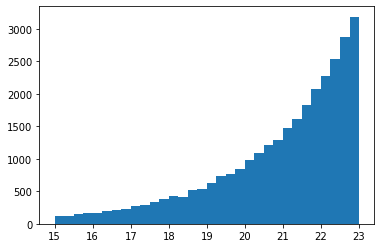

In [10]:
import matplotlib.pyplot as plt
plt.hist(star_mags.numpy(), range=(15, 23), bins=32)

# SNR of stars

In [11]:
from hydra import compose, initialize
from hydra.utils import instantiate
with initialize(config_path="../config"):
    cfg = compose("config")

In [14]:
sgdec = instantiate(cfg.datasets.galsim_blends.decoder.single_galaxy_decoder)

In [29]:
background = torch.full((80,80), 865)

In [36]:
from bliss.datasets.sdss import convert_mag_to_flux
flux1 = convert_mag_to_flux(torch.tensor([20])).item()
flux2 = convert_mag_to_flux(torch.tensor([23])).item()
psf1 = torch.from_numpy(sgdec.psf_galsim.withFlux(flux1).drawImage(nx=80, ny=80, scale=0.393).array)
psf2 = torch.from_numpy(sgdec.psf_galsim.withFlux(flux2).drawImage(nx=80, ny=80, scale=0.393).array)

In [37]:
# calculate snr for each single exposure
img1 = psf1 + background
snr1 = torch.sqrt(torch.sum(psf1**2 / img1)).item()

img2 = psf2 + background
snr2 = torch.sqrt(torch.sum(psf2**2 / img2)).item()


print(snr1,snr2)

45.11176300048828 3.3315091133117676


In [38]:
#coadd d = 25


img1 = (psf1 + background)/ np.sqrt(25)
snr1 = torch.sqrt(torch.sum(psf1**2 / img1)).item()

img2 = (psf2 + background)/ np.sqrt(25)
snr2 = torch.sqrt(torch.sum(psf2**2 / img2)).item()


print(snr1,snr2)

100.87297821044922 7.4494805335998535
